I am not sure I should be continuing to use notebooks. I am making breaking changes in the `fae` library anyway. How should I do things? A bunch of software, some doc in markdown, a few notebooks to make pretty graphics? And maybe as an objective, blog post "publications"?

I need to focus more, think more, medidate each morning, stop reddit and starcraft

Anyway...

I'll revert my shuffling of the dataset before the validation split. I actually want whole sections that are not in the rest of the dataset. I need to remake experiments...

- Do a helper function for the initial imports?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from fae import dataset_loader
from fae.training_utils import Experiment, ExperimentSet

import numpy as np
import tensorflow as tf

import keras

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam, SGD
from keras import backend as K

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:.2f}'.format})

def pprint(iteratable):
    for i in iteratable:
        print(i)

In [11]:
es = ExperimentSet()
es.random_params({
        'dropout' : [0, 0.1, 0.2, 0.4],
        'core_size' : [512, 256, 1024],
        'num_layers' : [2, 3, 5],
        'activation' : ["relu"],
        'input_size' :[10]
    },
    6)


pprint(es.params_set)

{'dropout': 0.2, 'core_size': 1024, 'num_layers': 3, 'activation': 'relu', 'input_size': 10}
{'dropout': 0.1, 'core_size': 1024, 'num_layers': 5, 'activation': 'relu', 'input_size': 10}
{'dropout': 0.2, 'core_size': 256, 'num_layers': 5, 'activation': 'relu', 'input_size': 10}
{'dropout': 0, 'core_size': 1024, 'num_layers': 3, 'activation': 'relu', 'input_size': 10}
{'dropout': 0.4, 'core_size': 1024, 'num_layers': 3, 'activation': 'relu', 'input_size': 10}
{'dropout': 0, 'core_size': 512, 'num_layers': 3, 'activation': 'relu', 'input_size': 10}


In [14]:
es.create_experiments(fit_params = { 'batch_size':10000,
                            'epochs':500,
                            'verbose':0,
                            'shuffle':True,
                            'validation_split':0.1},
            compile_params={'loss'    :'mean_squared_error',
                            'metrics' :['mean_squared_error']},
            data_loader = 'fae.dataset_loader.load_dataset_mmp("../../..//datasets/real/2019-10-18/raw/", shuffle=False)[:2]',
            set_name="es20191025")

In [15]:
es.run(display=10)

--------------------
es1 dropout=0.20 core_size=1024 num_layers=3 activation=relu input_size=10 
Epoch: 10/500 ...  - loss: 0.1711 - mean_squared_error: 0.1711 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch: 20/500 ...  - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0880 - val_mean_squared_error: 0.0880
Epoch: 30/500 ...  - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch: 40/500 ...  - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch: 50/500 ...  - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch: 60/500 ...  - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch: 70/500 ...  - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch: 80/500 ...  - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0236 - val_mean_squar

Epoch: 220/500 ...  - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch: 230/500 ...  - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch: 240/500 ...  - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch: 250/500 ...  - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch: 260/500 ...  - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch: 270/500 ...  - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch: 280/500 ...  - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch: 290/500 ...  - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch: 300/500 ...  - loss: 0.0072 - mean_squared_error: 0.0072 - val_lo

Epoch: 430/500 ...  - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch: 440/500 ...  - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch: 450/500 ...  - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch: 460/500 ...  - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch: 470/500 ...  - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch: 480/500 ...  - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch: 490/500 ...  - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
--------------------
es1 dropout=0 core_size=1024 num_layers=3 activation=relu input_size=10 
Epoch: 10/500 ...  - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.0321 - val_mean_s

Epoch: 150/500 ...  - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch: 160/500 ...  - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch: 170/500 ...  - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch: 180/500 ...  - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch: 190/500 ...  - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch: 200/500 ...  - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch: 210/500 ...  - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch: 220/500 ...  - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch: 230/500 ...  - loss: 0.0150 - mean_squared_error: 0.0150 - val_lo

Epoch: 360/500 ...  - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch: 370/500 ...  - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch: 380/500 ...  - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch: 390/500 ...  - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch: 400/500 ...  - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch: 410/500 ...  - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch: 420/500 ...  - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch: 430/500 ...  - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch: 440/500 ...  - loss: 0.0015 - mean_squared_error: 0.0015 - val_lo

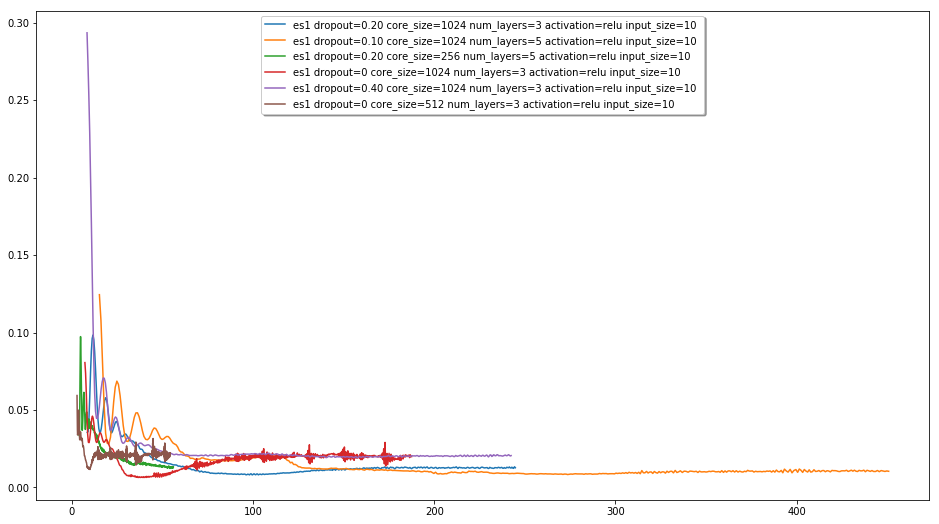

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
es.plot(trim_left=15)


In [22]:
es = ExperimentSet()

es.params_set = (
{'dropout': 0.2, 'core_size': 1024, 'num_layers': 5, 'activation': 'relu', 'input_size': 10},
{'dropout': 0, 'core_size': 1024, 'num_layers': 5, 'activation': 'relu', 'input_size': 10},
{'dropout': 0, 'core_size': 256, 'num_layers': 8, 'activation': 'relu', 'input_size': 10},
{'dropout': 0.2, 'core_size': 256, 'num_layers': 8, 'activation': 'relu', 'input_size': 10}
)

In [23]:
es.create_experiments(fit_params = { 'batch_size':10000,
                            'epochs':500,
                            'verbose':0,
                            'shuffle':True,
                            'validation_split':0.1},
            compile_params={'loss'    :'mean_squared_error',
                            'metrics' :['mean_squared_error']},
            data_loader = 'fae.dataset_loader.load_dataset_mmp("../../..//datasets/real/2019-10-18/raw/", shuffle=False)[:2]',
            set_name="es20191025")
es.run(display=20, )

--------------------
es20191025 dropout=0.20 core_size=1024 num_layers=5 activation=relu input_size=10 
Epoch: 20/500 ...  - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1179 - val_mean_squared_error: 0.1179
Epoch: 40/500 ...  - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch: 60/500 ...  - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch: 80/500 ...  - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch: 100/500 ...  - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch: 120/500 ...  - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch: 140/500 ...  - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch: 160/500 ...  - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0230 - val

Epoch: 440/500 ...  - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch: 460/500 ...  - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch: 480/500 ...  - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
--------------------
es20191025 dropout=0.20 core_size=256 num_layers=8 activation=relu input_size=10 
Epoch: 20/500 ...  - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0512 - val_mean_squared_error: 0.0512
Epoch: 40/500 ...  - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch: 60/500 ...  - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch: 80/500 ...  - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch: 100/500 ...  - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0278 - val_

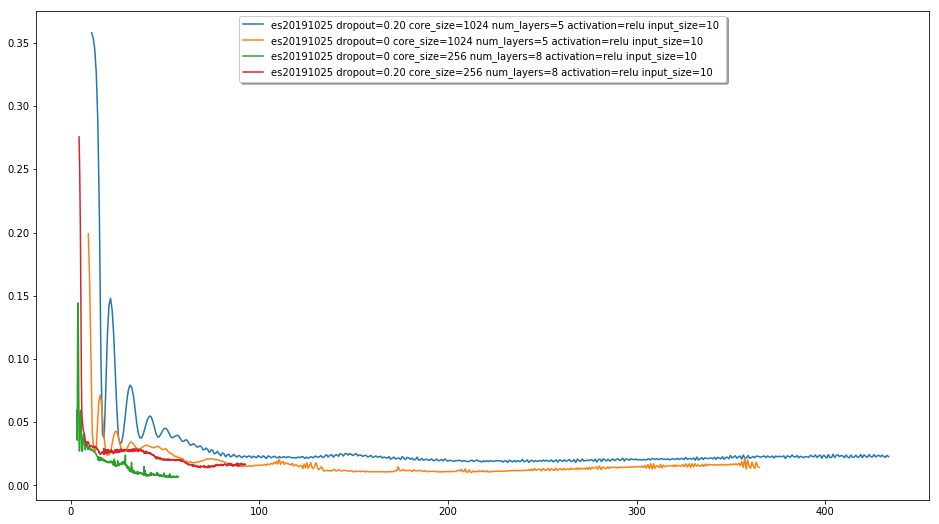

In [25]:
es.plot(trim_left=10)

In [29]:
es3 = ExperimentSet()

es3.params_set = (
{'dropout': 0, 'core_size': 128, 'num_layers': 8, 'activation': 'relu', 'input_size': 10},
{'dropout': 0, 'core_size': 128, 'num_layers': 15, 'activation': 'relu', 'input_size': 10},
{'dropout': 0, 'core_size': 256, 'num_layers': 8, 'activation': 'relu', 'input_size': 10},
{'dropout': 0, 'core_size': 256, 'num_layers': 15, 'activation': 'relu', 'input_size': 10}
)

es3.create_experiments(fit_params = { 'batch_size':10000,
                            'epochs':500,
                            'verbose':0,
                            'shuffle':True,
                            'validation_split':0.1},
            compile_params={'loss'    :'mean_squared_error',
                            'metrics' :['mean_squared_error']},
            data_loader = 'fae.dataset_loader.load_dataset_mmp("../../..//datasets/real/2019-10-18/raw/", shuffle=False)[:2]',
            set_name="es20191025")

es3.run(display=20, )

--------------------
es20191025 dropout=0 core_size=128 num_layers=8 activation=relu input_size=10 
Epoch: 20/500 ...  - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch: 40/500 ...  - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch: 60/500 ...  - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch: 80/500 ...  - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch: 100/500 ...  - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch: 120/500 ...  - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch: 140/500 ...  - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch: 160/500 ...  - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0110 - val_mea

Epoch: 440/500 ...  - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch: 460/500 ...  - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch: 480/500 ...  - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
--------------------
es20191025 dropout=0 core_size=256 num_layers=15 activation=relu input_size=10 
Epoch: 20/500 ...  - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch: 40/500 ...  - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch: 60/500 ...  - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch: 80/500 ...  - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch: 100/500 ...  - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0287 - val_me

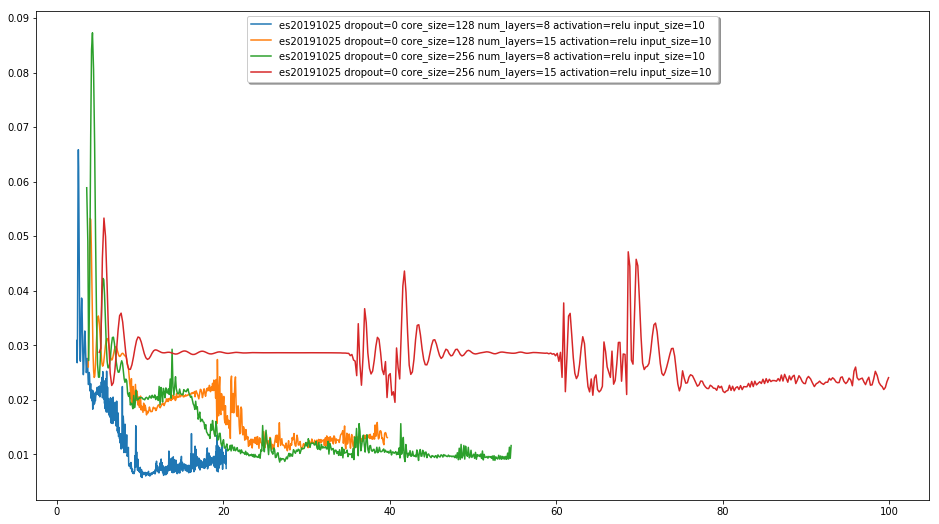

In [31]:
es3.plot(trim_left=10)

In [35]:
es3.experiments[0].model.save("models/fae.mmp.20191025.bin")

In [36]:
es3.experiments[0].label

'es20191025 dropout=0 core_size=128 num_layers=8 activation=relu input_size=10 '

This is what you want: 'es20191025 dropout=0 core_size=128 num_layers=8 activation=relu input_size=10 '